# Template Matching

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('.\\DATA\\sammy.jpg')
full =cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

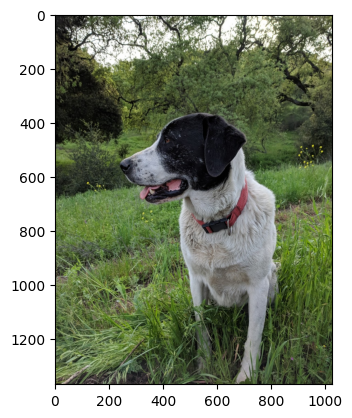

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('.\\DATA\\sammy_face.jpg')
face =cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

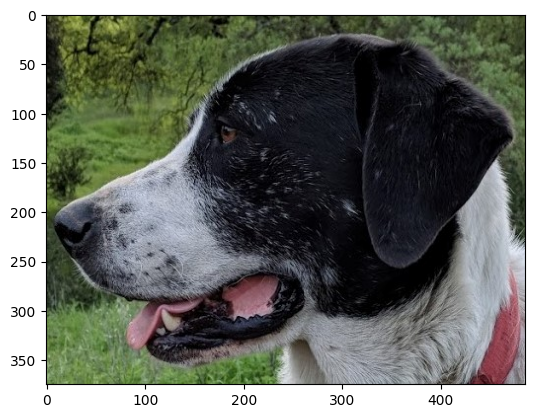

In [5]:
plt.imshow(face)

In [6]:
full.shape

(1367, 1025, 3)

In [7]:
face.shape

(375, 486, 3)

In [8]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

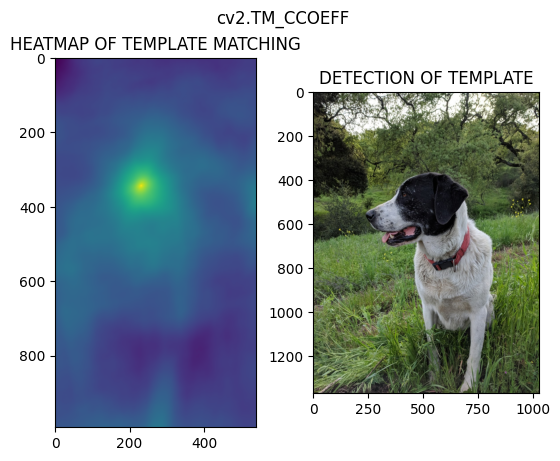

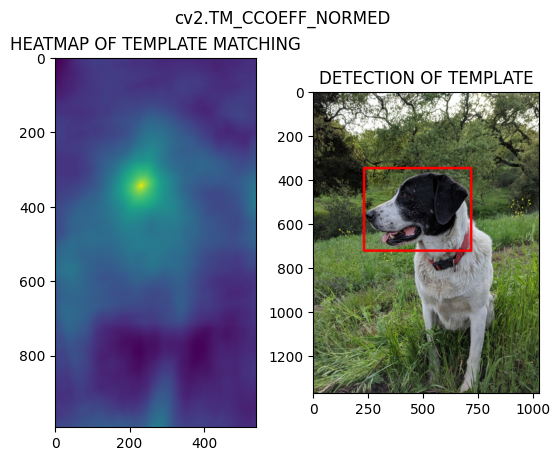

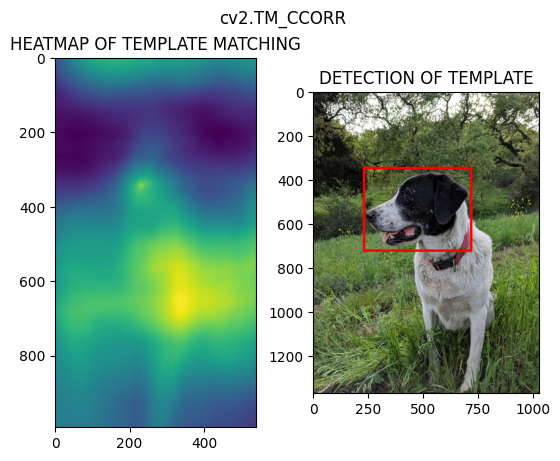

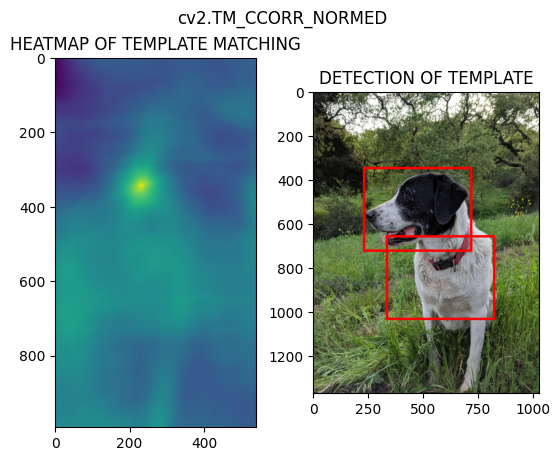

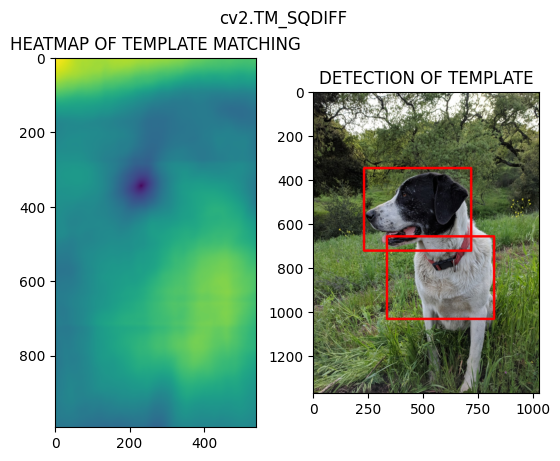

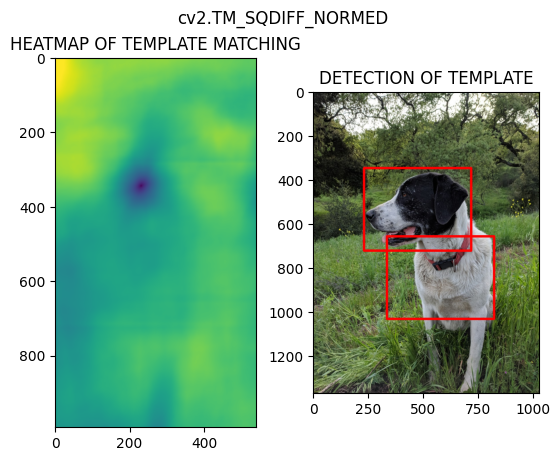

In [9]:
for m in methods:
    # CREATE A COPY
    full_copy = full.copy()

    method = eval(m)

    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full, top_left, bottom_right, (255,0,0), 10)

    # PLOT AND SHOW THE IMAGES

    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')

    

In [10]:
my_method = eval('cv2.TM_CCOEFF_NORMED')
res = cv2.matchTemplate(full, face, my_method)

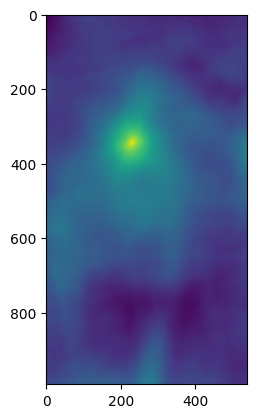

In [11]:
plt.imshow(res)

# Corner Detection

In [12]:
flat_chess = cv2.imread('.\\DATA\\flat_chessboard.png')
flat_chess =cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

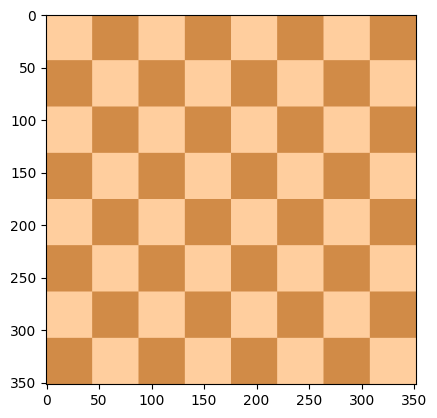

In [13]:
plt.imshow(flat_chess)

In [14]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

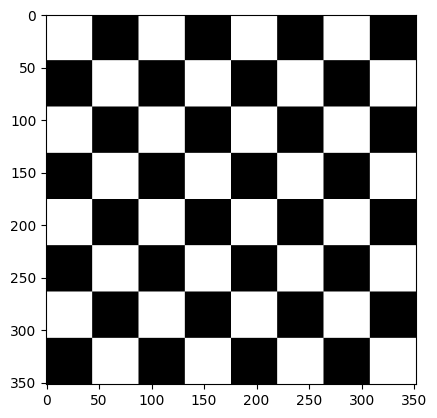

In [15]:
plt.imshow(gray_flat_chess, cmap = 'gray')

In [16]:
real_chess = cv2.imread('.\\DATA\\real_chessboard.jpg')
real_chess =cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

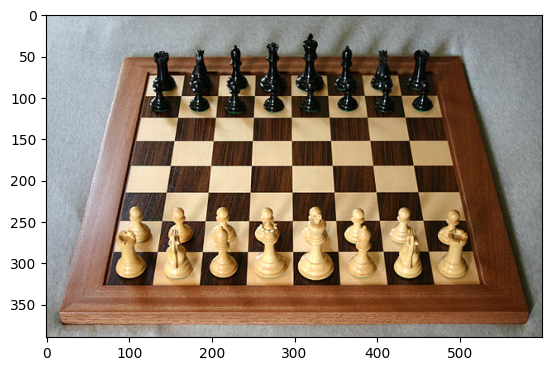

In [17]:
plt.imshow(real_chess)

In [18]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

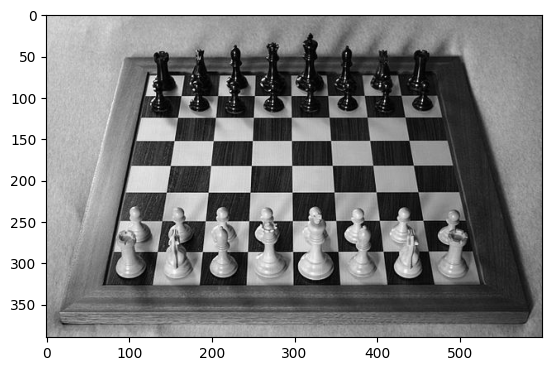

In [19]:
plt.imshow(gray_real_chess, cmap = 'gray')

In [20]:
gray = np.float32(gray_flat_chess)

In [21]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.4)

In [22]:
dst = cv2.dilate(dst, None)

In [23]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

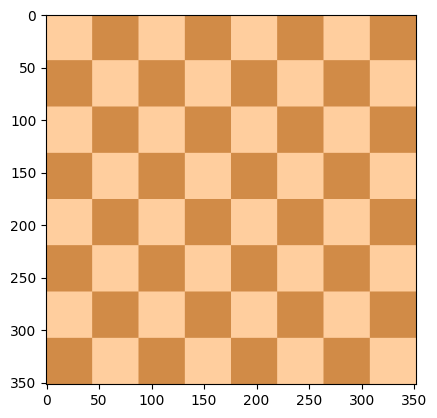

In [24]:
plt.imshow(flat_chess)